Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100

<ipython-input-6-9613b2cc516d>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")


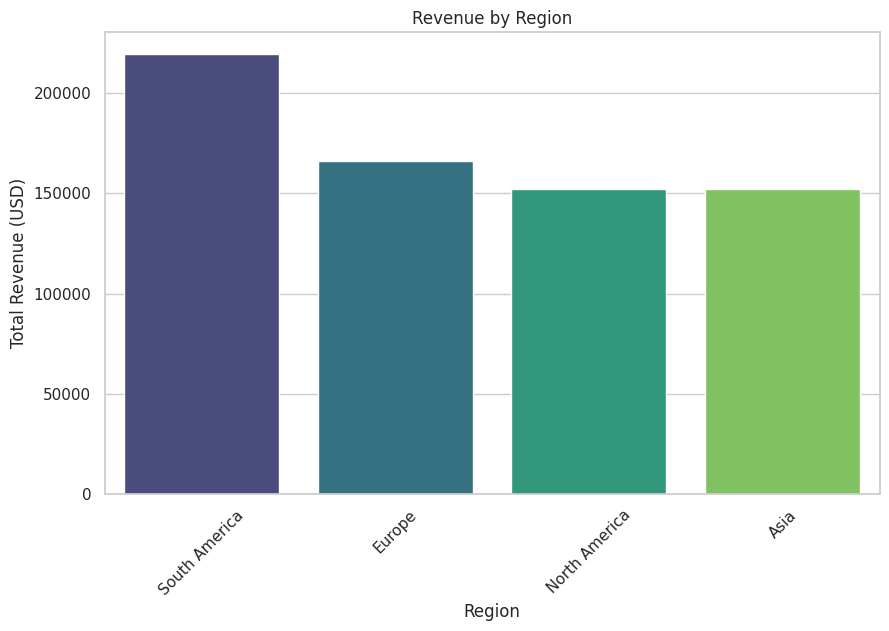

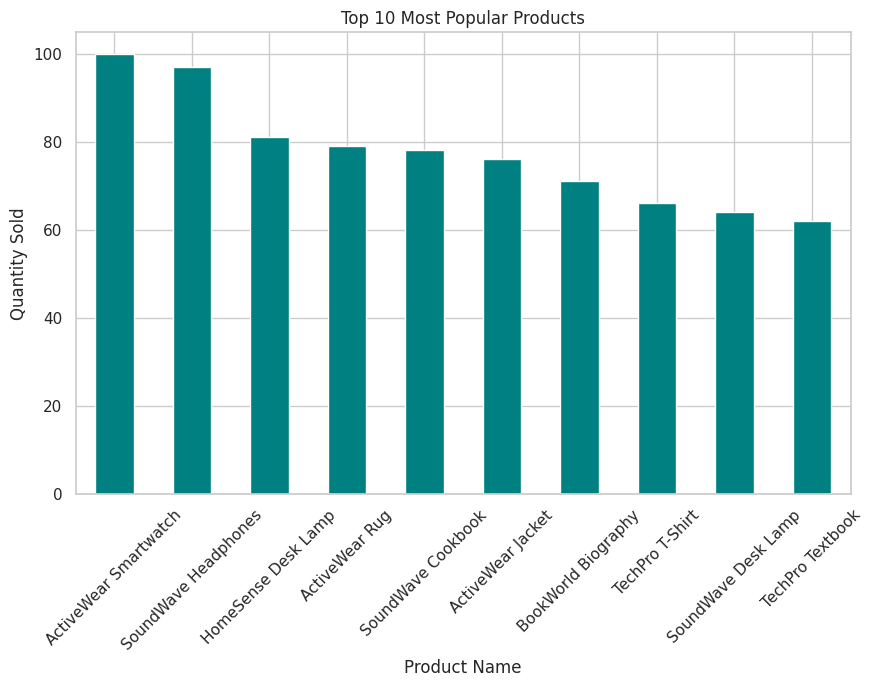

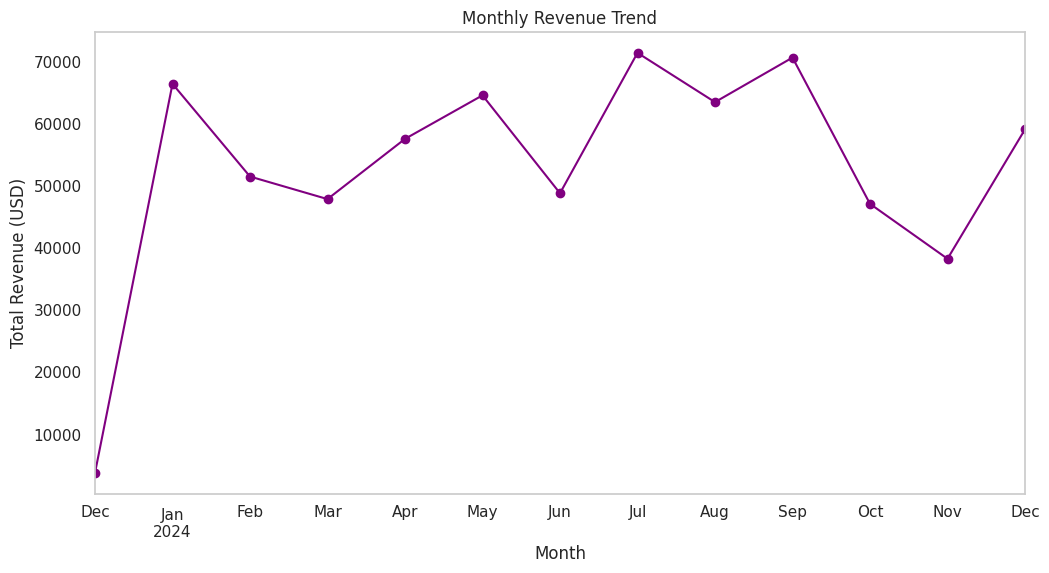

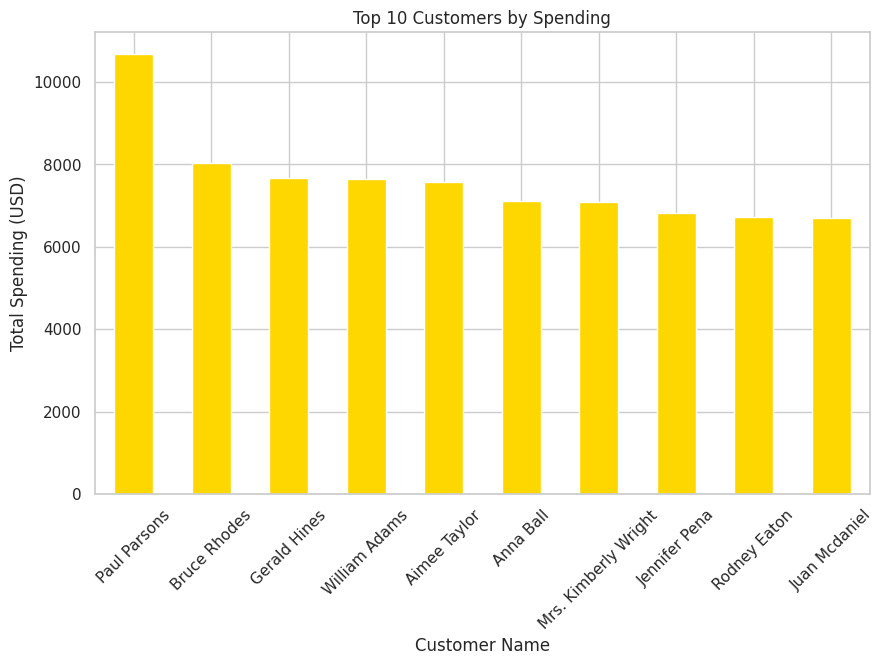

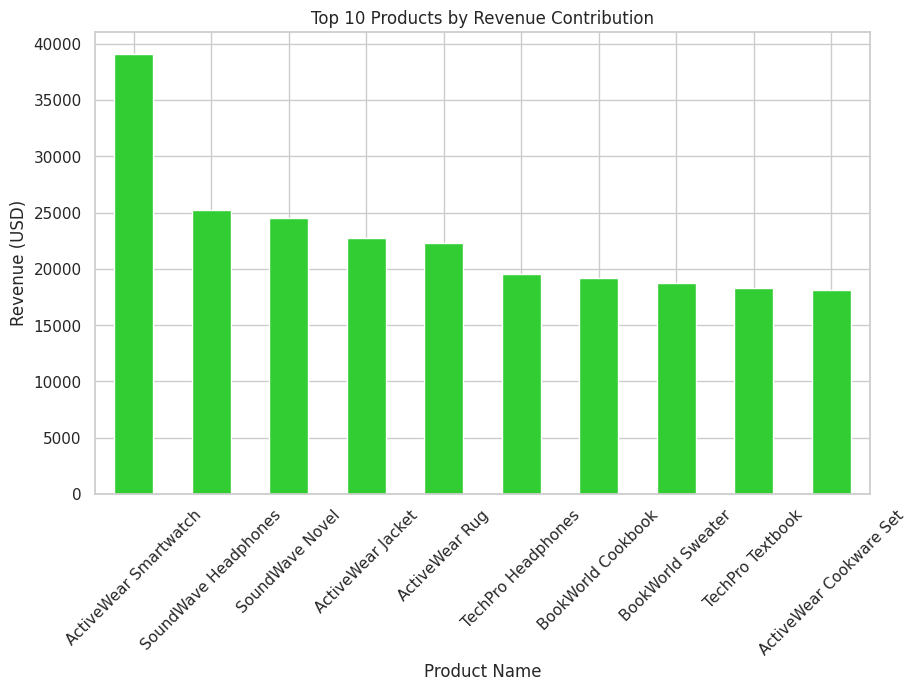

In [6]:
#Exploratory Data Analysis (EDA) and Business Insights
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


print("Customers Data:")
print(customers.info())
print(customers.head())

print("Products Data:")
print(products.info())
print(products.head())

print("Transactions Data:")
print(transactions.info())
print(transactions.head())


data = pd.merge(transactions, customers, on="CustomerID")
data = pd.merge(data, products, on="ProductID")


print("Missing values in merged data:")
print(data.isnull().sum())


print("Descriptive statistics:")
print(data.describe())


revenue_by_region = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Revenue by Region:")
print(revenue_by_region)

popular_products = data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("Most Popular Products:")
print(popular_products)

top_customers = data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Spending:")
print(top_customers)

data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
data["Month"] = data["TransactionDate"].dt.to_period("M")
monthly_revenue = data.groupby("Month")["TotalValue"].sum()
print("Monthly Revenue Trend:")
print(monthly_revenue)

product_revenue = data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue Contribution:")
print(product_revenue)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")
plt.title("Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
popular_products.plot(kind="bar", color="teal")
plt.title("Top 10 Most Popular Products")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker="o", color="purple")
plt.title("Monthly Revenue Trend")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Month")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
top_customers.plot(kind="bar", color="gold")
plt.title("Top 10 Customers by Spending")
plt.ylabel("Total Spending (USD)")
plt.xlabel("Customer Name")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
product_revenue.plot(kind="bar", color="limegreen")
plt.title("Top 10 Products by Revenue Contribution")
plt.ylabel("Revenue (USD)")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()




